<a href="https://colab.research.google.com/github/sergeymasl/my_lifehacks/blob/main/My_lifehacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шпаргалка по [pandas](https://habr.com/ru/company/ruvds/blog/494720/)

---



Отправка датафрейма на почту в удобоваримом виде

[Ссылка на отправку простой почты](https://habr.com/ru/company/pechkin/blog/281915/)


[Объекты email.mime](https://digitology.tech/docs/python_3/library/email.mime.html)



---



In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# датафрейм в виде HTML страницы
send = f"""\
    <html>
      <head></head>
      <body>
        {df.to_html()}
      </body>
    </html>
    """
# создание объекта mime
msg = MIMEMultipart()
# создание самого сообщения
part = MIMEText(send, 'html')
# прикрепление сообщения к объекту
msg.attach(part)

# подключение к серверу электронной почты. yandex 
smtpObj = smtplib.SMTP('smtp.yandex.ru', 587)
# шифрование
smtpObj.starttls()
# авторизация
smtpObj.login('stepikairflowcourse@yandex.ru','123456aA-')
# отправка сообщения
smtpObj.sendmail('stepikairflowcourse@yandex.ru','stepikairflowcourse@yandex.ru', msg.as_string())
smtpObj.quit()

Добавление столбца с датой и временем добавления строки

---


In [ ]:
data["insert_time"] = pd.to_datetime("now")

[Поиск](https://habr.com/ru/post/470938/) в Яндексе и работа с веббраузером


---



In [ ]:
str_search = 'https://yandex.ru/search/?text=' + input()
webbrowser.open(str_search, new=2)

Вызов переменной в строке

---

In [ ]:
g = 'fuck'
print(f'Hey i can do this {g}')
print('Hey {0} can do {1} {2}'.format('i', 'this', 'fuck'))

Hey i can do this fuck
Hey i can do this fuck


[Работа с исключениями](https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html) сон программы и условие по повторению итерации цикла

---


In [ ]:
for i in range(df.shape[0]):
    # цикл заставляющий повторить итерацию, если будет ошибка, гениально
    successful = False
    while not successful:
        # работа с исключениями
        try:
            inn = df.loc[i, 'inn']
            df.loc[i, 'result'] = str(dadata.find_by_id("party", "7707083893"))
        except Exception:
            print('oshibca, epta')
            time.sleep(1)
            successful = True

Стандартная библиотека [glob](https://pythonworld.ru/moduli/modul-glob.html) позволяющая проверять некий каталог на наличие файлов с спецсимволами

In [ ]:
for file in glob.glob("source/*[.]xlsx"):
    print(str(file))

# вывод
# source\магнит_ттн_мясная_гастр_0122.xlsx
# source\магнит_ттн_мясная_гастр_0222.xlsx
# source\магнит_ттн_мясная_гастр_1221.xlsx

Проверка на NaN

---




In [ ]:
g = np.nan
g == g

Преобразование строки даты в формат [datetime](https://pythonru.com/primery/kak-ispolzovat-modul-datetime-v-python), а потом преобразование в year

---



In [ ]:
#преобразуем строку в объект datetime
d = datetime.datetime.strptime('2010-12-01 08:26:00', '%Y-%m-%d %H:%M:%S')
print(d.year)
# 2010
#создать новый солбец с неделями из объекта datetime
df['week'] = df['date'].apply(lambda x: dt.date.isocalendar(x)[1])

Использование функции [map()](https://www.digitalocean.com/community/tutorials/how-to-use-the-python-map-function-ru) (приминение какой либо функции ко всему итерируемому объекту)

---



In [ ]:
for name in df.columns:
  if len(name) == (min(map(len, df.columns))):
    print(name)
# Country

lis = list(map(len, df.columns))
print(lis)
# [9, 9, 11, 8, 11, 9, 10, 7]

Для уменьшения количества занимаемо памяти можно изменить [тип данных](https://numba.pydata.org/numba-doc/0.12/tutorial_types.html#:~:text=is%20not%20exahustive.-,Integral%20types,-%C2%B6) на тип данных который занимает меньше битов


---



In [ ]:
map_column_to_type = {
    'category_id': np.int16,
    'item_nds_rate': np.int16,
    'item_price': np.int16,
    'item_quantity': np.float32,
    'receipt_dayofweek': np.int16,
    'receipt_id': np.int32}

Оконные функции в [DataFrame](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html)


---



In [ ]:
df['col'] = df.groupby('col_1')['col_2'].transform('sum')

Отображение времени выполнения 

---


In [ ]:
%%time
print('hello_world')

hello_world
CPU times: user 65 µs, sys: 15 µs, total: 80 µs
Wall time: 85.4 µs


Удаление NaN только в определенном столбце

---



In [ ]:
catalog.dropna(subset=['Выражения идентификаторы бренда'],inplace=True)

Загрузка файлов в Colab из GitHub

---



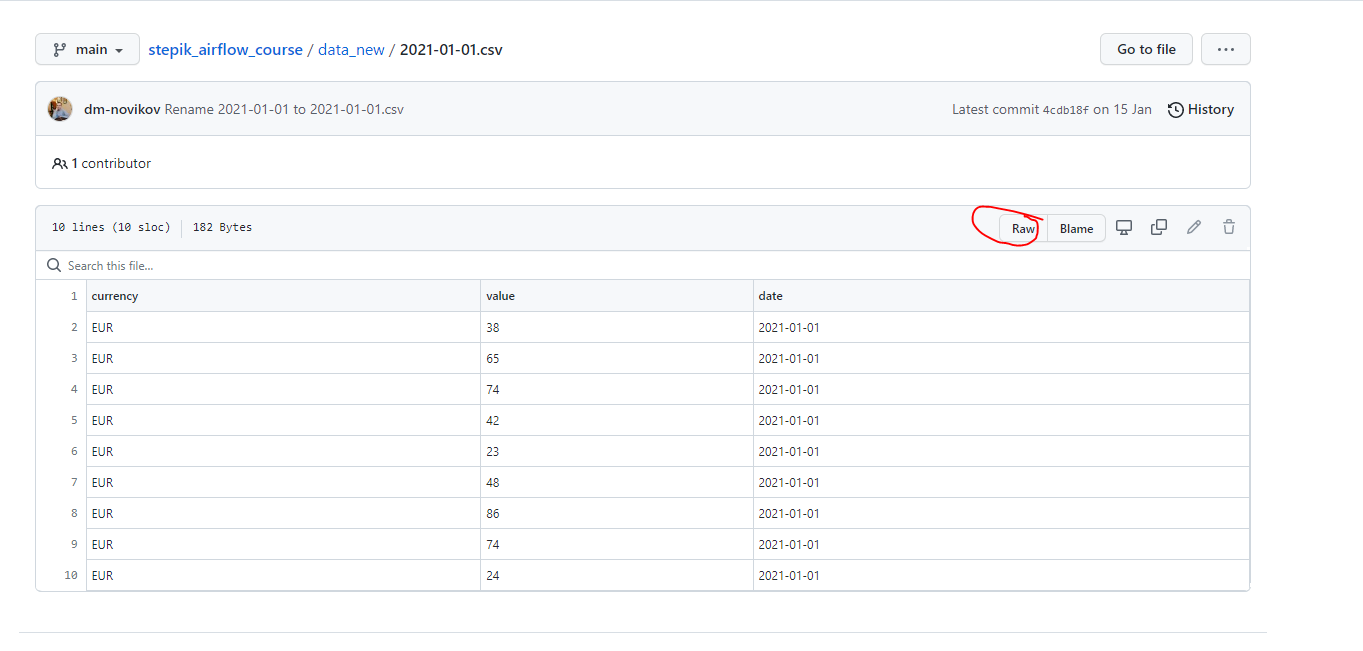

In [ ]:
url = 'https://raw.githubusercontent.com/dm-novikov/stepik_airflow_course/main/data_new/2021-01-01.csv'
df1 = pd.read_csv(url)

Загрузка файлов в Colab с локального диска

---



In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('wage-data.csv')

Включение всплывающих команд в Jupiter с помощью Tab

---



In [ ]:
%config IPCompleter.greedy=True

Считывание данных в датафрейм из Google Drive

---



In [ ]:
url = 'https://drive.google.com/file/d/1imxbb6tU7wTnR0q1eGmy6N1qpf4grKdV/view?usp=sharing' #ссылка на файл(в Drive нужно открыть доступ для просмотра)
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
pd.read_csv(path)

Выгрузка данных на гугл диск

---



In [ ]:
from google.colab import drive
drive.mount('drive')
df1.to_csv('data.csv',sep=';',)
!cp data.csv "drive/My Drive/"

Названия столбцов таблицы базы данных PostreSQL

---



In [ ]:
print('test_task_billing:')
cursor.execute('''select * from information_schema.columns 
where table_catalog = 'wazzup_data_mart' and  
table_name = 'test_task_billing';''')
for row in cursor:
  print (row)

Совместная работа Python и SQL

---



In [ ]:
import psycopg2
conn = psycopg2.connect(
    host='rc1c-fhrb9f1e0l9g611h.mdb.yandexcloud.net', port='6432', database='hr-analytics',
    user='analytics', password='HRanalytics')
cursor = conn.cursor()
cursor.execute('''
SELECT * FROM table
''')
list1 = []
for row in cursor:
  list1.append(row)
df1 = DataFrame(list1, columns = ['Месяц', 'Год', 'Выручка'])
(df1)

Транслитерация:

[Справочная информация на русском](https://docs-python.ru/packages/modul-transliterate-python/)

[Справочная информация и ссылки на загрузку](https://pypi.org/project/transliterate/)

---

